In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d dumanmesut/individual-carbon-footprint-calculation

Dataset URL: https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation
License(s): CC0-1.0
  0% 0.00/236k [00:00<?, ?B/s]
100% 236k/236k [00:00<00:00, 93.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/individual-carbon-footprint-calculation.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#import necessary package

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

In [ ]:
path = "/content/Carbon Emission.csv"
df = pd.read_csv(path)

# Print some part of the dataset
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [ ]:
unique_values = df['Body Type'].unique()


print("Unique values in the 'Body Type' column:", unique_values)

Unique values in the 'Body Type' column: ['overweight' 'obese' 'underweight' 'normal']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [ ]:
df.dtypes

,0
Body Type,object
Sex,object
Diet,object
How Often Shower,object
Heating Energy Source,object
Transport,object
Vehicle Type,object
Social Activity,object
Monthly Grocery Bill,int64
Frequency of Traveling by Air,object


In [ ]:
# Dropping categorical columns
# Select only non-categorical columns (e.g., numeric types)
df_numerical = df.select_dtypes(exclude=['object', 'category'])

df_numerical

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
0,230,210,4,7,26,1,2238
1,114,9,3,9,38,5,1892
2,138,2472,1,14,47,6,2595
3,157,74,3,20,5,7,1074
4,266,8457,1,3,5,6,4743
...,...,...,...,...,...,...,...
9995,230,268,5,12,27,9,2408
9996,234,5316,3,14,8,24,3084
9997,298,96,5,11,5,24,2377
9998,179,8688,5,19,14,5,4574


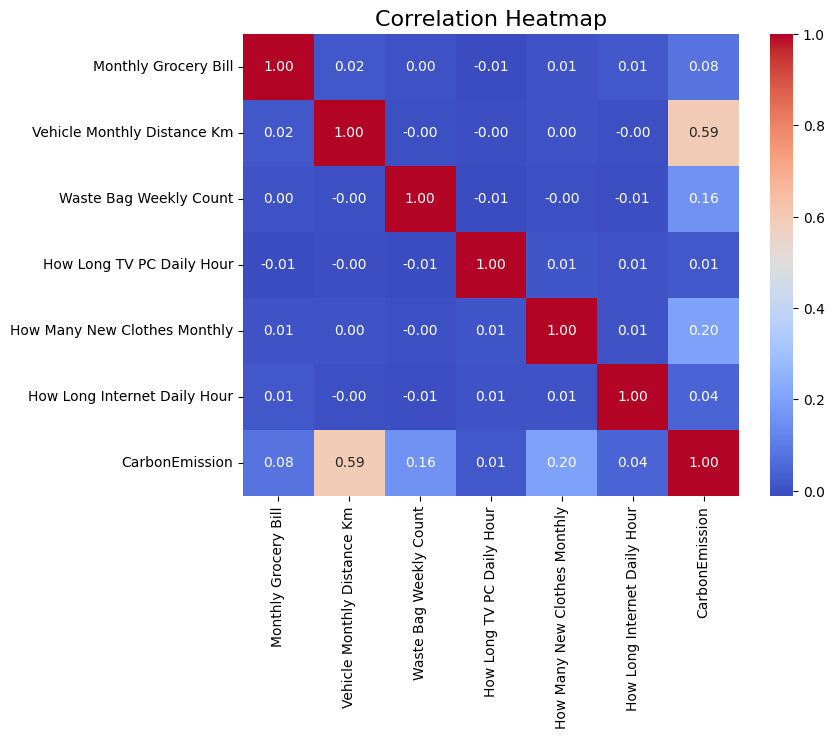

In [ ]:
# Create a correlation matrix for numerical data
correlation_matrix = df_numerical.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Adding a title for the heatmap
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
#Define features and target
features = ['Monthly Grocery Bill',	'Vehicle Monthly Distance Km',	'Waste Bag Weekly Count',	'How Long TV PC Daily Hour',	'How Many New Clothes Monthly',	'How Long Internet Daily Hour']
target = 'CarbonEmission'

X = df_numerical[features]
Y = df_numerical[target]

#Train-Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initializing the Linear Regression Model
model = LinearRegression()

In [ ]:
# Training the Model
model.fit(X_train_scaled, Y_train)

# Making Predictions
Y_train_pred = model.predict(X_train_scaled)
Y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model on the test set
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
test_score = model.score(X_test_scaled, Y_test) * 100

# Evaluate the model on the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(Y_train, Y_train_pred)
train_score = model.score(X_train_scaled, Y_train) * 100

In [ ]:
# Print the evaluation metrics for the test set
print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Test R-squared (R²) score: {test_score:.4f}")

# Print the evaluation metrics for the training set
print(f"Train Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Train Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Train Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Train R-squared (R²) score: {train_score:.4f}")

Test Mean Squared Error (MSE): 571387.1529
Test Root Mean Squared Error (RMSE): 755.9015
Test Mean Absolute Error (MAE): 594.4374
Test R-squared (R²) score: 45.0435
Train Mean Squared Error (MSE): 602308.7852
Train Root Mean Squared Error (RMSE): 776.0856
Train Mean Absolute Error (MAE): 603.9702
Train R-squared (R²) score: 41.7702


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define and train the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_scaled, Y_train)

# Predict using the Decision Tree Regressor
Y_pred_tree = decision_tree_model.predict(X_test_scaled)

# Define and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_scaled, Y_train)

# Predict using the Random Forest Regressor
Y_pred_forest = random_forest_model.predict(X_test_scaled)

# Evaluate models
print("Decision Tree Results:")
mse_tree = mean_squared_error(Y_test, Y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")

print("\nRandom Forest Results:")
mse_forest = mean_squared_error(Y_test, Y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(Y_test, Y_pred_forest)
print(f"Mean Squared Error (MSE): {mse_forest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_forest:.2f}")
print(f"R2 Score: {r2_forest:.2f}")


Decision Tree Results:
Mean Squared Error (MSE): 1337207.99
Root Mean Squared Error (RMSE): 1156.38

Random Forest Results:
Mean Squared Error (MSE): 623245.16
Root Mean Squared Error (RMSE): 789.46
R2 Score: 0.40


In [46]:
# Compare RMSE values for all models
models = {
    "Linear Regression": {"model": model, "rmse": 755.9015},
    "Random Forest": {"model": random_forest_model, "rmse": 1156.38},
    "Decision Tree": {"model": decision_tree_model, "rmse": 789.46}
}

# Find the model with the least RMSE (least loss)
best_model_name = min(models, key=lambda x: models[x]["rmse"])
best_model = models[best_model_name]["model"]

# Save the best model to a file
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Best model saved: {best_model_name}")

Best model saved: Linear Regression


In [48]:
# Save the trained Random Forest model
joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']